In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
# encode each bandit are samples from some distrabtion, 
# stationary
class normal_bandit:
    def __init__(self, mean_, std_):
        self.mean = mean_
        self.std = std_

    def sample(self):
        return np.random.normal(self.mean, self.std)

In [313]:
def print_bandit_estimates(estimates):
    for i in range(len(estimates)):
        print("Bandit ", i+1, ": ", f'{estimates[i]:.4f}')

In [210]:
# Setting up the problem
def make_k_random_bandit(k):
    BANDITS = []
    MEANS = []
    for i in range(k):
        b_i_mean = np.random.normal(0,1)
        BANDITS.append(normal_bandit(b_i_mean, 1))
        MEANS.append(b_i_mean)
    return BANDITS, MEANS

BANDITS, MEANS = make_k_random_bandit(10)
print(MEANS)

[0.15404774530849574, -0.9440211735603077, 0.1543742160647523, -0.912695288213956, 0.23299813810416783, 0.28838397587618375, -0.09934518498869967, 0.7363915620246827, 0.3403949849124529, -1.07253763398692]


In [15]:
# HARDER, using different type of distrabutions TBD

Setting up the problem

Amassed: 175.8099596852211 in 1000 moves !


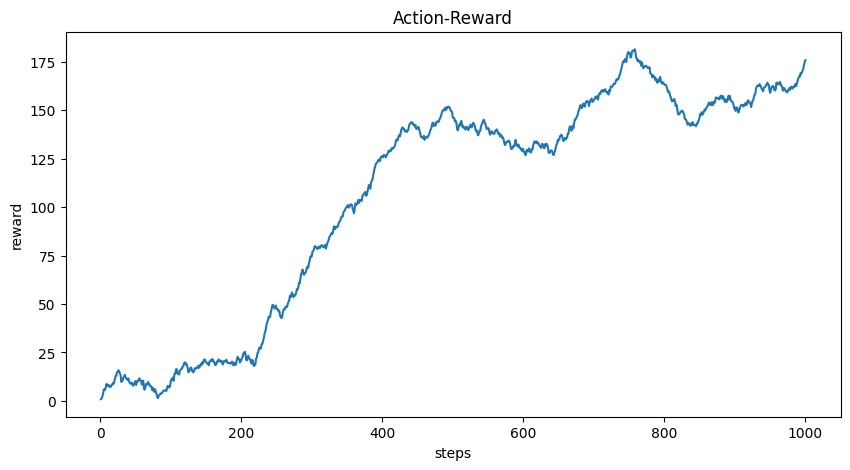

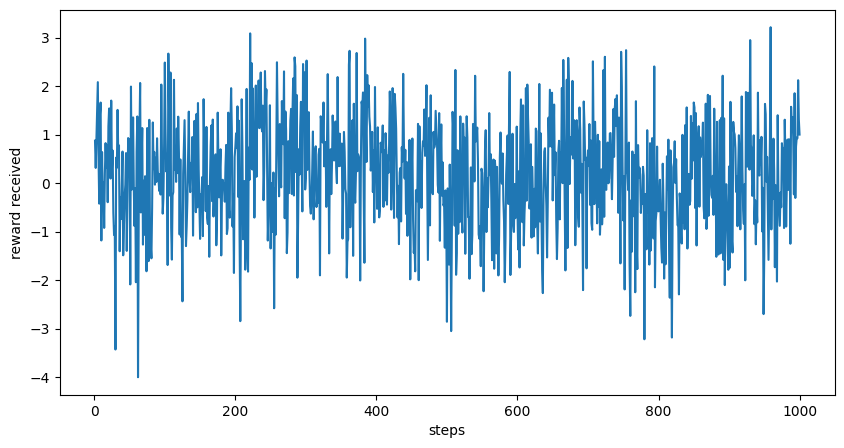

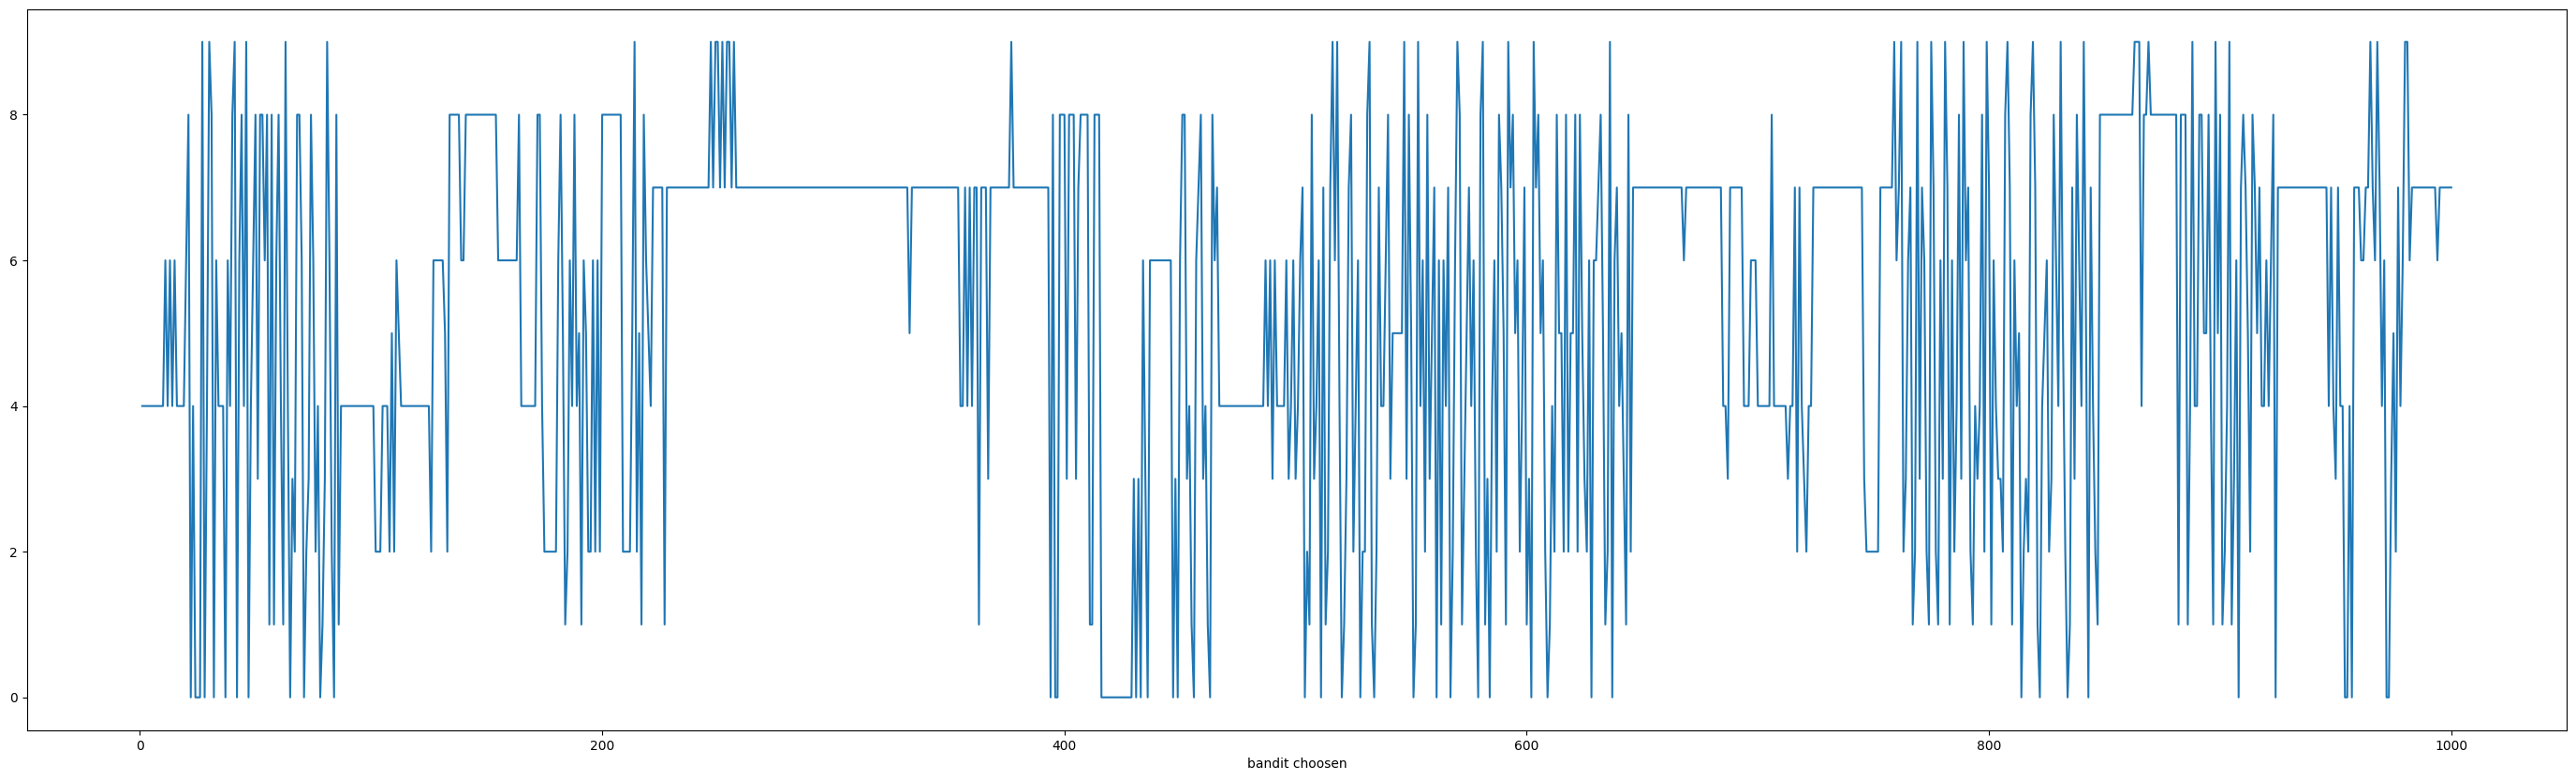

Bandit  1 :  0.1641
Bandit  2 :  0.1644
Bandit  3 :  0.1645
Bandit  4 :  0.1634
Bandit  5 :  0.1640
Bandit  6 :  0.1641
Bandit  7 :  0.1698
Bandit  8 :  0.1758
Bandit  9 :  0.1643
Bandit  10 :  0.1644


In [360]:
def greedy_pick(estimate):
    return np.argmax(estimate)

def explore_pick():
    return np.random.randint(len(BANDITS)) #randint() is uniform

def update_estimate(i, prev_reward):
    n = len(prev_reward[i])
    return sum(prev_reward[i]) / n



prev_reward = [[]] * 10 # used for updating estimate
estimate = [0] * 10 # estimate for each bandit

reward = 0
running_reward_record = [] # amassed reward
reward_record = [] # reward received after each action 
choice_record = [] # 

epsilon = 0.1 # can be anything between [0,1)
T = 1000


i = explore_pick()
x = BANDITS[i].sample()
reward += x

prev_reward[i].append(x)
reward_record.append(x)
running_reward_record.append(reward)
estimate[i] = update_estimate(i, prev_reward)
choice_record.append(i)

for t in range(T-1):
    if(random.uniform(0,1) < epsilon): # exploratoru pick (prob of epsilon)
        i = explore_pick()
    else:                              # greedy pick
        i = greedy_pick(estimate)
        
    x = BANDITS[i].sample()
    reward += x
    
    prev_reward[i].append(x)
    reward_record.append(x)
    running_reward_record.append(reward)
    estimate[i] = update_estimate(i, prev_reward)
    choice_record.append(i)
    



print("Amassed:", reward, "in", len(running_reward_record), "moves !")
X = np.arange(1,T+1) 
Y = running_reward_record

plt.figure(figsize=(10, 5))
plt.title("Running Reward")
plt.xlabel("steps")
plt.ylabel("reward")
plt.plot(X,Y)

plt.title("Action-Reward")
plt.figure(figsize=(10, 5))
plt.xlabel("steps")
plt.ylabel("reward received")
Y = reward_record
plt.plot(X,Y)

# bandit choice
plt.figure(figsize=(35, 10))
plt.xlabel("bandit choosen")
# plt.hist(choice_record
plt.plot(X,choice_record)
plt.show()


print_bandit_estimates(estimate)


# Why is this one so much worst then incremental update?

Amassed: 556.8249312268775 in 1000 moves !


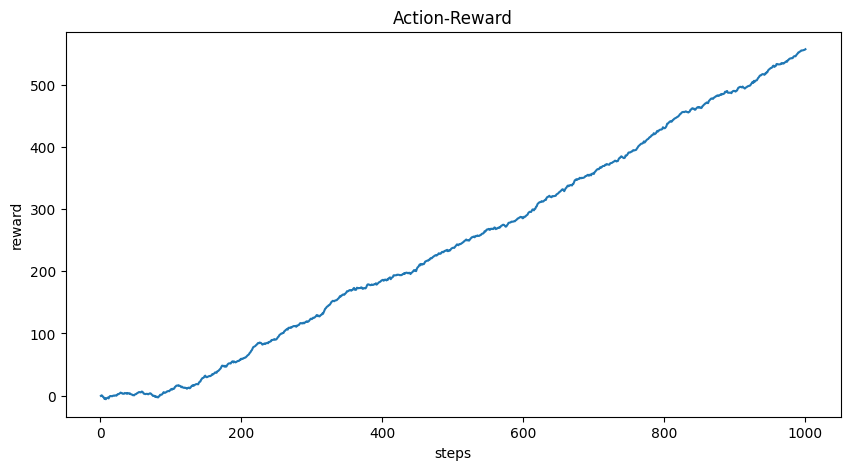

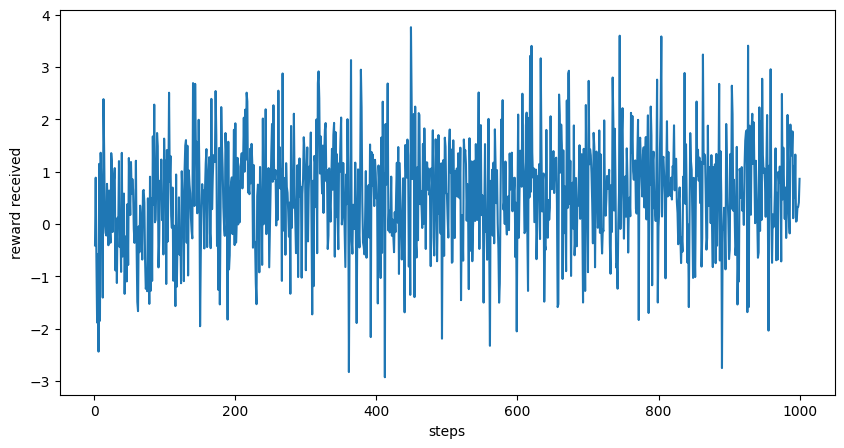

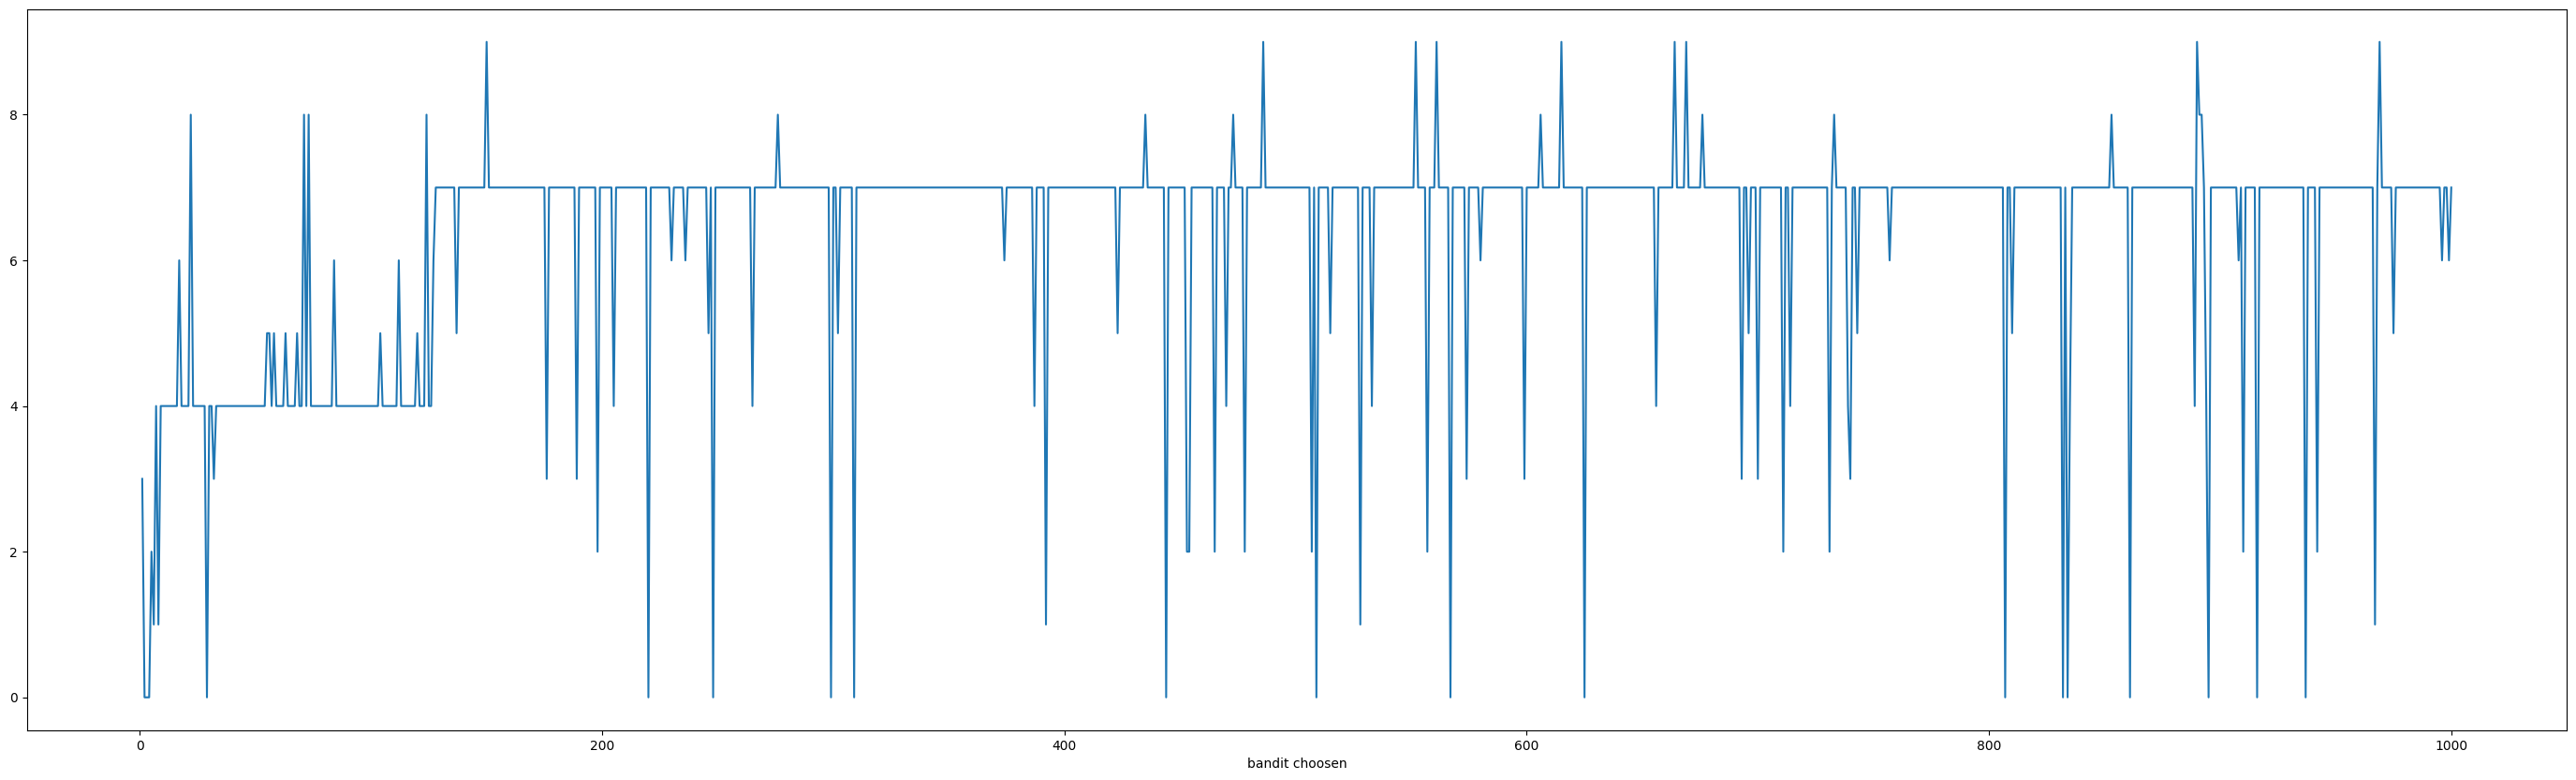

Bandit  1 :  0.0538
Bandit  2 :  -1.4129
Bandit  3 :  0.0766
Bandit  4 :  -1.2674
Bandit  5 :  0.2200
Bandit  6 :  0.1620
Bandit  7 :  -0.1474
Bandit  8 :  0.7069
Bandit  9 :  0.1115
Bandit  10 :  -1.4589


In [358]:
# same as above but using incremental change 
def incremental_update_estimate(i, reward, old_estimate, n):
    return old_estimate + ((1/n) * (reward - old_estimate))


bandit_count = [0] * 10 # keep track on how many times a bandit was choosen
estimate = [0] * 10 #future idea, use random initial estimate

reward = 0 # we seek to maximize 
running_reward_record = [] # running sum of reward
reward_record = [] # individual reward recieved
choice_record = [] # record which choices we made

epsilon = 0.1 # can be anything between [0,1)
T = 1000


# start running

i = explore_pick()
x = BANDITS[i].sample()
bandit_count[i] += 1
estimate[i] = incremental_update_estimate(i, x, estimate[i], bandit_count[i])
reward += x
reward_record.append(x)
running_reward_record.append(reward)
choice_record.append(i)

for t in range(T-1):
    if(random.uniform(0,1) < epsilon): # exploratoru pick (prob of epsilon)
        i = explore_pick()
    else:                              # greedy pick
        i = greedy_pick(estimate)

    x = BANDITS[i].sample()
    bandit_count[i] += 1
    estimate[i] = incremental_update_estimate(i, x, estimate[i], bandit_count[i])
    reward += x
    reward_record.append(x)
    running_reward_record.append(reward)
    choice_record.append(i)
# end running


print("Amassed:", reward, "in", len(running_reward_record), "moves !")
X = np.arange(1,T+1) 
Y = running_reward_record

plt.figure(figsize=(10, 5))
plt.title("Running Reward")
plt.xlabel("steps")
plt.ylabel("reward")
plt.plot(X,Y)

plt.title("Action-Reward")
plt.figure(figsize=(10, 5))
plt.xlabel("steps")
plt.ylabel("reward received")
Y = reward_record
plt.plot(X,Y)
plt.show()

# bandit choice
plt.figure(figsize=(35, 10))
plt.xlabel("bandit choosen")
# plt.hist(choice_record
plt.plot(X,choice_record)
plt.show()


print_bandit_estimates(estimate)


In [274]:
# "For any learning method, we can measure its performacne and behavior as 
# improves with experience over 1000 time steps... This makes up one run.
T = 1000
RUNS = 1000
epsilon = 0.25 # can be anything between [0,1)
run_reward_record = []
run_running_reward_record = []

for r in range(RUNS):

    
    i = explore_pick()
    x = BANDITS[i].sample()
    bandit_count[i] += 1
    estimate[i] = incremental_update_estimate(i, x, estimate[i], bandit_count[i])
    reward += x
    reward_record.append(x)
    running_reward_record.append(reward)
    choice_record.append(i)
    
    for t in range(T-1):
        if(random.uniform(0,1) < epsilon): # exploratoru pick (prob of epsilon)
            i = explore_pick()
        else:                              # greedy pick
            i = greedy_pick(estimate)
    
        x = BANDITS[i].sample()
        bandit_count[i] += 1
        estimate[i] = incremental_update_estimate(i, x, estimate[i], bandit_count[i])
        reward += x
        reward_record.append(x)
        running_reward_record.append(reward)
        choice_record.append(i)

    # end runloop
    run_reward_record.append(reward_record)
    run_running_reward_record.append(running_reward_record)
# end main loop
avg_run_reward_record = [sum(i) / RUNS for i in zip(*run_reward_record)]
avg_run_running_reward_record = [sum(i) / RUNS for i in zip(*run_running_reward_record)]

Amassed an average of:  110.27153201547475 in 1000 moves.


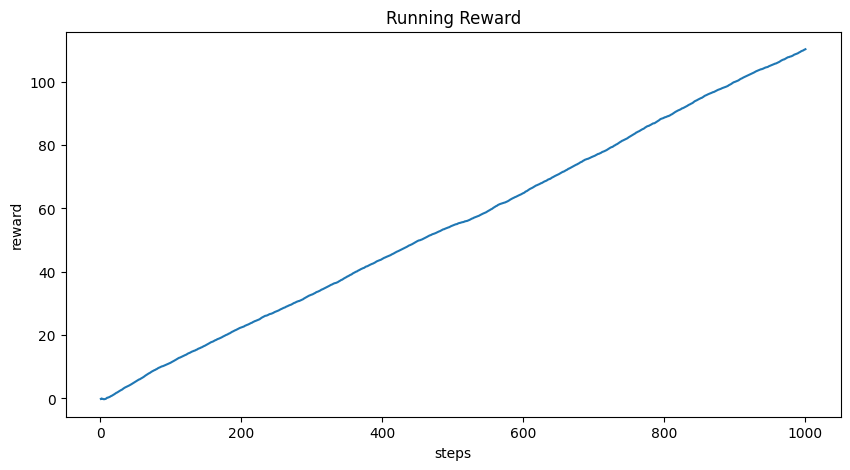

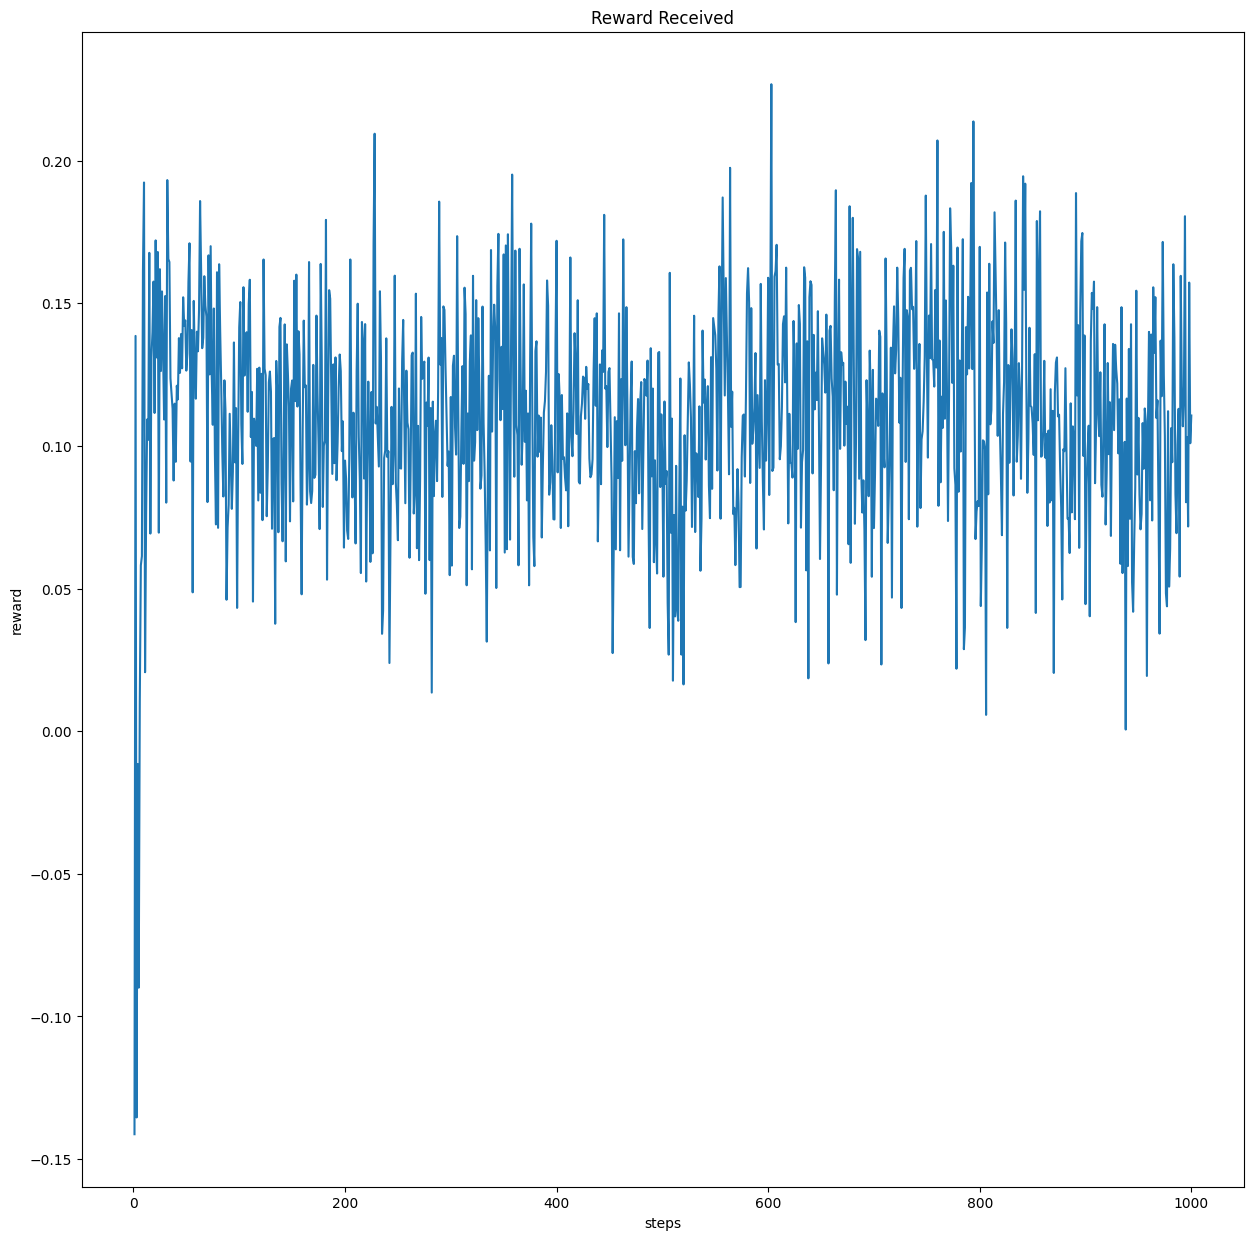

In [275]:

print("Amassed an average of: ", avg_run_running_reward_record[len(avg_run_running_reward_record)-1], "in", T, "moves.")


X = np.arange(1,T+1) 
Y = avg_run_running_reward_record

plt.figure(figsize=(10, 5))
plt.title("Running Reward")
plt.xlabel("steps")
plt.ylabel("reward")
plt.plot(X,Y)
plt.show()

Y = avg_run_reward_record
plt.figure(figsize=(15, 15))
plt.title("Reward Received")
plt.xlabel("steps")
plt.ylabel("reward")
plt.plot(X,Y)
plt.show()

Amassed: -78.54238288023886 in 1000 moves !


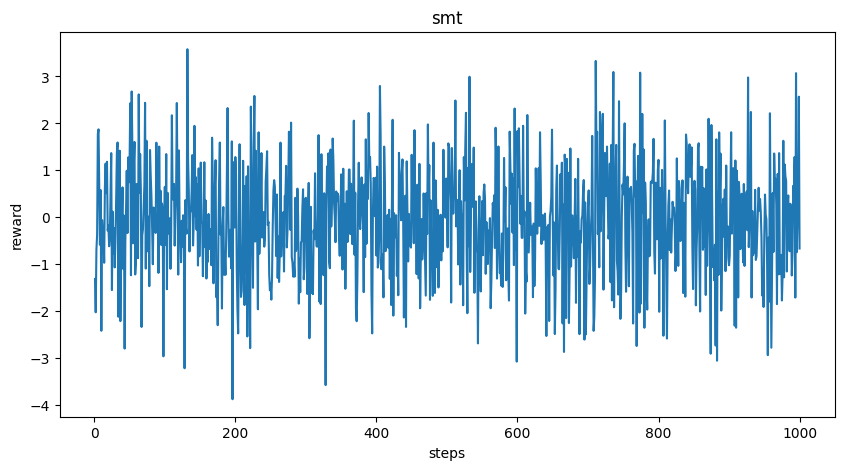

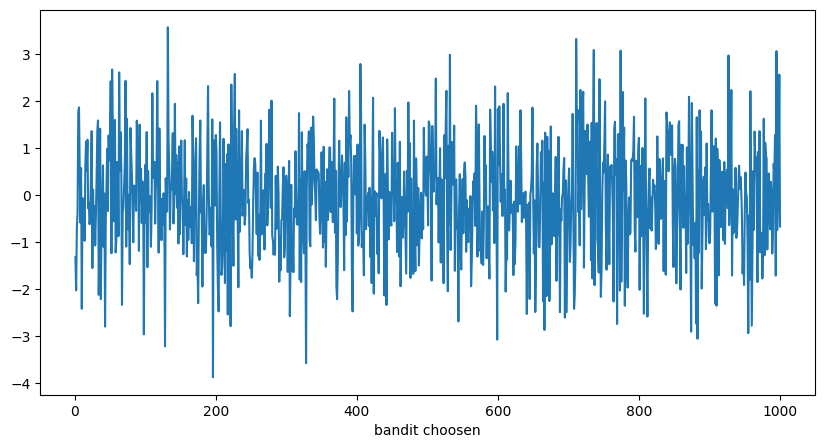

In [276]:
# BENCHMAKR, RANDOM CHOICE

reward = 0 # we seek to maximize 
running_running_reward_record = [] # for visual later
choice_record = [] # record which choices we made

T = 1000

for t in range(T):
    i = np.random.randint(len(BANDITS))
    x = BANDITS[i].sample()
    running_running_reward_record.append(x)
    choice_record.append(x)
    reward += x


print("Amassed:", reward, "in", len(running_running_reward_record), "moves !")
X = np.arange(1,T+1) 
Y = running_running_reward_record

plt.figure(figsize=(10, 5))
plt.xlabel("steps")
plt.ylabel("reward")
plt.plot(X,Y)
plt.title("smt")

# bandit choice
plt.figure(figsize=(10, 5))
plt.xlabel("bandit choosen")
plt.plot(X,choice_record)
plt.show()


In [17]:
def run(RUNS, T, K, EPSILON):
    REWARDS = []
    REWARDS_CHANGE = []
    
    for r in range(RUNS):
        BANDITS = make_random_bandits(K)
        prev_estimates = [[]] * K # the estimate funciton  # future idea, 
        estimate = [0] * K #future idea, use random initial estimate
        reward = 0 # we seek to maximize 
        running_running_reward_record = [] # for visual later
        choice_record = []
        epsilon = EPSILON # can be anything between [0,1)

        for t in range(T):
            i = explore_pick()
            # print(i)
            x = BANDITS[i].sample()
            estimate[i] = update_estimate(i, x, prev_estimates)
            prev_estimates[i].append(x)
            reward += x
            for t in range(T):
                if(random.uniform(0,1) < epsilon): # explorertory pick
                    i = explore_pick()
                else:                              # greedy pick
                    i = greedy_pick(estimate)
        
            x = BANDITS[i].sample()
            estimate[i] = update_estimate(i, x, prev_estimates)
            prev_estimates[i].append(x)
            reward += x
            running_running_reward_record.append(reward)
            choice_record.append(i)


        REWARDS.append(reward)
        REWARDS_CHANGE.append(running_running_reward_record)


    return REWARDS_CHANGE

In [278]:
# none stationary bandits

# still using a normal distrabutions
class nonstationary_bandit:
    def __init__(self, mean_, std_, bias_):
        self.bias = bias_ # bias will be an increase that will be the sum of "random walks"
        self.mean = mean_
        self.std = std_

    def sample(self):
        self.bias += np.random.normal(0, 0.1)
        return np.random.normal(self.mean, self.std) + self.bias


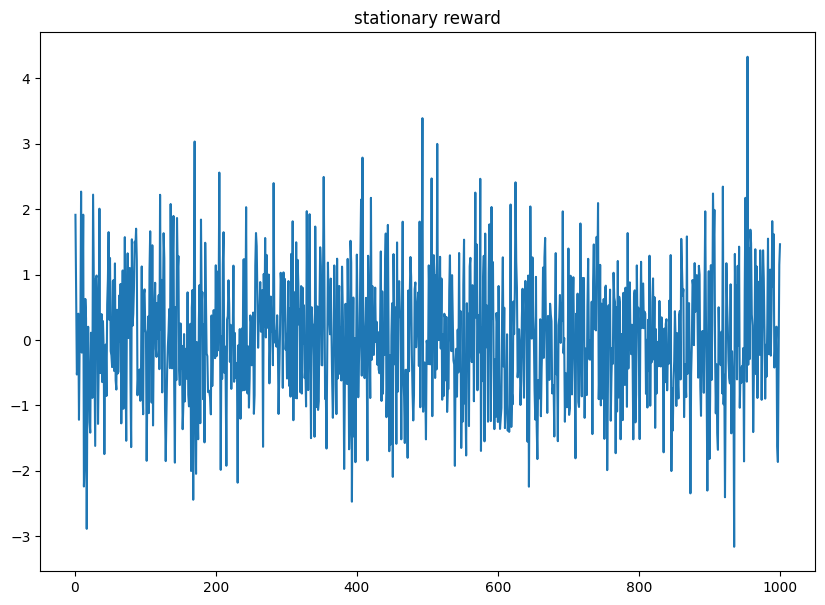

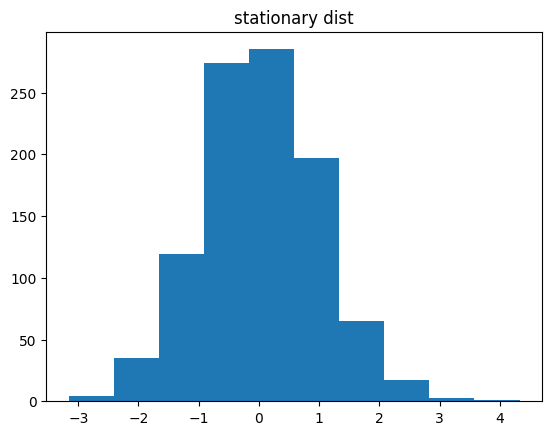

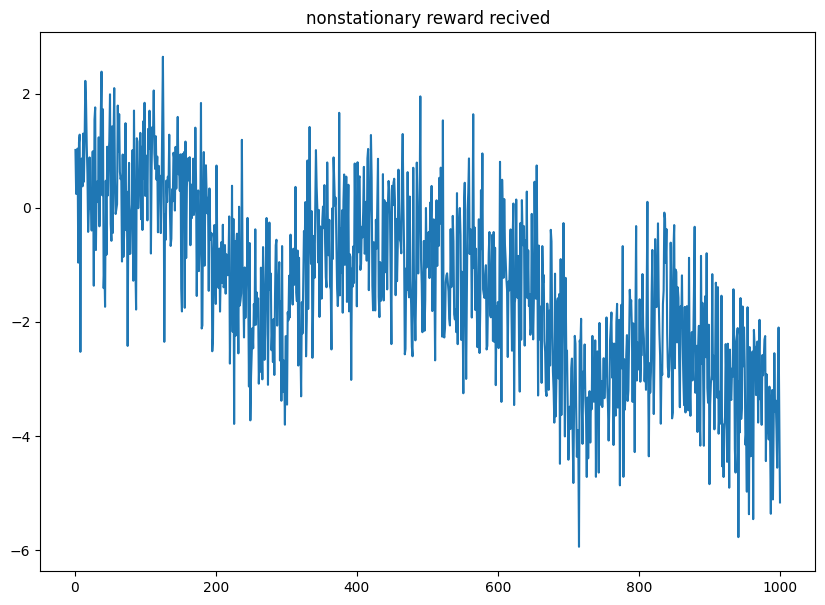

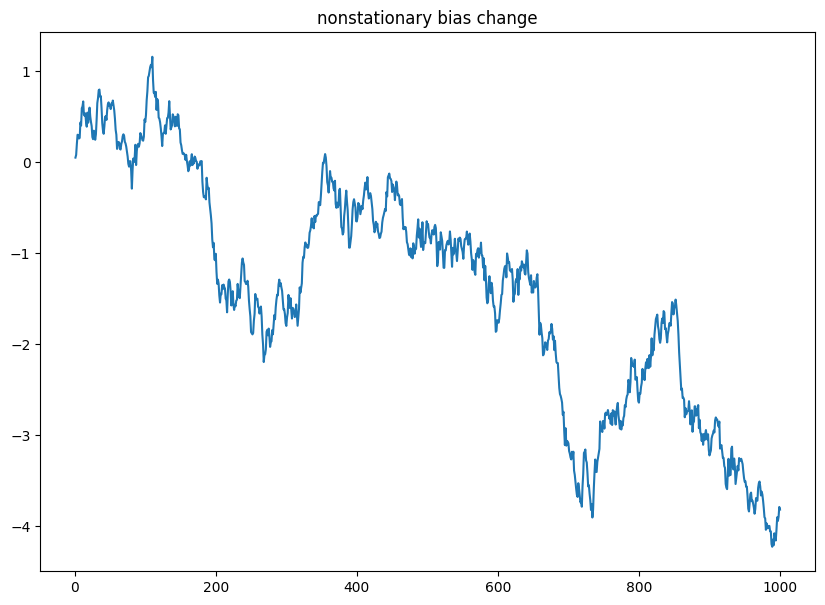

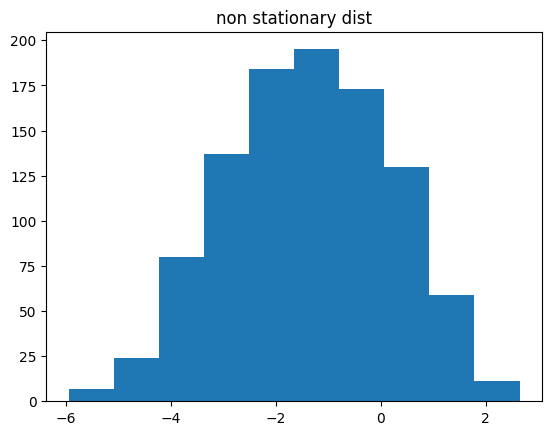

In [285]:
b1 = nonstationary_bandit(0,1,0)
b2 = normal_bandit(0,1)

T = 1000


Y = []
for i in range(T):
    Y.append(b2.sample())

X = np.arange(1,T+1) 

plt.figure(figsize=(10,7))
plt.title("stationary reward")
plt.plot(X,Y)
plt.show()


plt.hist(Y)
plt.title("stationary dist")
plt.show()




Y = [] #reward
bY = [] # track bias

for i in range(T):
    Y.append(b1.sample())
    bY.append(b1.bias)

X = np.arange(1,T+1) 

plt.figure(figsize=(10,7))
plt.title("nonstationary reward recived")
plt.plot(X,Y)
plt.show()

plt.figure(figsize=(10,7))
plt.title("nonstationary bias change")
plt.plot(X,bY)
plt.show()


plt.hist(Y)
plt.title("non stationary dist")
plt.show()